In [1]:
!pip install tensorflow
!pip install scikit-learn
!pip install pandas

In [52]:
import pandas as pd
import sklearn as sk;
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score;
import re
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm

In [5]:
df= pd.read_csv('all-data.csv', encoding='latin1')
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


In [6]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [10]:

import nltk;
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
!pip install nltk

In [27]:

try:
    df = pd.read_csv('all-data.csv', delimiter=',', quotechar='"', encoding='latin-1', header=None, names=['label', 'text'])
    print(df.head())
except UnicodeDecodeError as e:
    print(f"UnicodeDecodeError: {e}")

      label                                               text
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


In [28]:
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [29]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('punkt')
nltk.download('stopwords')


def clean_text(text):

    cleaned_text = ''.join([word.lower() for word in text if word.isalpha() or word.isspace()])

    tokens = word_tokenize(cleaned_text)
    return tokens

df['tokens'] = df['text'].apply(clean_text)
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
porter = PorterStemmer()
df['stemmed_tokens'] = df['filtered_tokens'].apply(lambda tokens: [porter.stem(word) for word in tokens])

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['stemmed_tokens'].apply(lambda tokens: ' '.join(tokens)))
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      label                                               text  \
0   neutral  According to Gran , the company has no plans t...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company 's updated strategy f...   

                                              tokens  \
0  [according, to, gran, the, company, has, no, p...   
1  [technopolis, plans, to, develop, in, stages, ...   
2  [the, international, electronic, industry, com...   
3  [with, the, new, production, plant, the, compa...   
4  [according, to, the, company, s, updated, stra...   

                                     filtered_tokens  \
0  [according, gran, company, plans, move, produc...   
1  [technopolis, plans, develop, stages, area, le...   
2  [international, electronic, industry, company,...   
3  [new, production, plant, company, would

In [88]:
df.describe()

,label_id
count,4846.000000
mean,0.530541
std,0.706008
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [33]:
!pip install torch transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


df_sampled = resample(df, random_state=1, n_samples=int(len(df) * 0.5))


label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
df_sampled['label_id'] = df_sampled['label'].map(label_map)

train_texts, val_test_texts, train_labels, val_test_labels = train_test_split(df_sampled['text'], df_sampled['label_id'],
                                                                             random_state=2024, test_size=0.4)

val_texts, test_texts, val_labels, test_labels = train_test_split(val_test_texts, val_test_labels,
                                                                  random_state=2024, test_size=0.5)


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


max_len = 128
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_len)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=max_len)
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=max_len)


train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels.tolist()))

val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            torch.tensor(val_labels.tolist()))

test_dataset = TensorDataset(torch.tensor(test_encodings['input_ids']),
                             torch.tensor(test_encodings['attention_mask']),
                             torch.tensor(test_labels.tolist()))


In [71]:

print(len(test_dataset))

485


In [49]:
print(len(train_dataset))

1453


In [45]:

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_map))

optimizer = AdamW(model.parameters(), lr=1e-5)
epochs = 3
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{epochs}'):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        model.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Average training loss: {avg_train_loss:.4f}')


    model.eval()
    val_accuracy = 0

    for batch in val_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to('cpu')

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        preds = np.argmax(logits.cpu().numpy(), axis=1)
        val_accuracy += np.sum(preds == labels.numpy())

    avg_val_accuracy = val_accuracy / len(val_texts)
    print(f'Validation accuracy: {avg_val_accuracy:.4f}')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/3: 100%|██████████| 122/122 [26:25<00:00, 13.00s/it]


Average training loss: 0.7878
Validation accuracy: 0.8062


Epoch 2/3: 100%|██████████| 122/122 [26:47<00:00, 13.17s/it]


Average training loss: 0.3940
Validation accuracy: 0.8825


Epoch 3/3: 100%|██████████| 122/122 [26:17<00:00, 12.93s/it]


Average training loss: 0.2081
Validation accuracy: 0.8825


In [56]:

torch.save(model.state_dict(), 'bert_model_state_dict.pth')


In [57]:
from torch.utils.data import DataLoader

batch_size = 16
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


model.eval()
test_predictions = []
true_labels = []

for batch in test_loader:
    input_ids = batch[0].to(device)
    attention_mask = batch[1].to(device)
    labels = batch[2].to('cpu')

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    preds = np.argmax(logits.cpu().numpy(), axis=1)
    test_predictions.extend(preds)
    true_labels.extend(labels.numpy())

test_accuracy = accuracy_score(true_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')

print(classification_report(true_labels, test_predictions, target_names=label_map.keys()))


cm = confusion_matrix(true_labels, test_predictions)
print(f'Confusion Matrix:\n{cm}')


Test Accuracy: 0.9175
              precision    recall  f1-score   support

     neutral       0.96      0.94      0.95       305
    positive       0.89      0.85      0.87       127
    negative       0.78      0.96      0.86        53

    accuracy                           0.92       485
   macro avg       0.88      0.92      0.89       485
weighted avg       0.92      0.92      0.92       485

Confusion Matrix:
[[286  14   5]
 [ 10 108   9]
 [  2   0  51]]


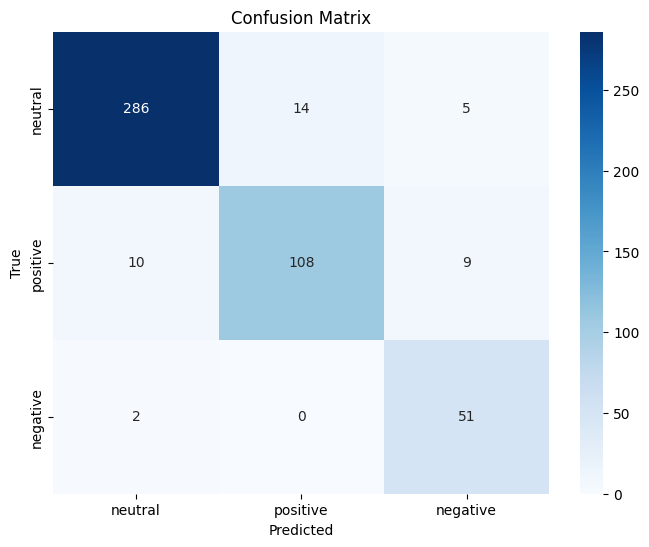

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import torch
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input_ids, attention_mask):
        embedded = self.dropout(self.embedding(input_ids))
        rnn_out, hidden = self.rnn(embedded)
        if self.rnn.bidirectional:
            hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
        else:
            hidden = self.dropout(hidden[-1,:,:])
        output = self.fc(hidden)
        return output

In [59]:
import torch.optim as optim

def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_acc = 0
    for batch in iterator:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        predictions = model(input_ids, attention_mask)
        loss = criterion(predictions, labels)
        acc = (predictions.argmax(dim=1) == labels).sum().item() / len(labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0
    with torch.no_grad():
        for batch in iterator:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            predictions = model(input_ids, attention_mask)
            loss = criterion(predictions, labels)
            acc = (predictions.argmax(dim=1) == labels).sum().item() / len(labels)
            epoch_loss += loss.item()
            epoch_acc += acc
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

vocab_size = len(tokenizer.vocab)
embed_dim = 100
hidden_dim = 256
output_dim = len(label_map)
n_layers = 2
bidirectional = True
dropout = 0.5

rnn_model = RNNModel(vocab_size, embed_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout)
rnn_model = rnn_model.to(device)

optimizer = optim.Adam(rnn_model.parameters())
criterion = nn.CrossEntropyLoss()
criterion = criterion.to(device)


batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


n_epochs = 5
for epoch in range(n_epochs):
    train_loss, train_acc = train(rnn_model, train_loader, optimizer, criterion)
    val_loss, val_acc = evaluate(rnn_model, val_loader, criterion)
    print(f'Epoch {epoch+1}/{n_epochs}')
    print(f'Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'Val. Loss: {val_loss:.3f} |  Val. Acc: {val_acc*100:.2f}%')

Epoch 1/5
Train Loss: 1.013 | Train Acc: 55.80%
Val. Loss: 0.959 |  Val. Acc: 58.27%
Epoch 2/5
Train Loss: 0.964 | Train Acc: 56.86%
Val. Loss: 0.918 |  Val. Acc: 56.81%
Epoch 3/5
Train Loss: 0.946 | Train Acc: 57.87%
Val. Loss: 0.877 |  Val. Acc: 62.26%
Epoch 4/5
Train Loss: 0.862 | Train Acc: 62.75%
Val. Loss: 0.953 |  Val. Acc: 61.90%
Epoch 5/5
Train Loss: 0.862 | Train Acc: 60.77%
Val. Loss: 0.854 |  Val. Acc: 63.06%


In [72]:
print(test_dataset)

In [79]:
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


batch_size = 16
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


rnn_model.eval()
test_predictions = []
true_labels = []

for batch in test_loader:
    input_ids = batch[0].to(device)
    attention_mask = batch[1].to(device)
    labels = batch[2].to(device)
    with torch.no_grad():
        predictions = rnn_model(input_ids, attention_mask)
        logits = predictions.argmax(dim=1)

    preds = logits.cpu().numpy()
    test_predictions.extend(preds)
    true_labels.extend(labels.cpu().numpy())

test_accuracy = accuracy_score(true_labels, test_predictions)
print(f'RNN Test Accuracy: {test_accuracy:.4f}')

label_map = {'neutral': 0, 'positive': 1, 'negative': 2}
print('RNN Classification Report:')
print(classification_report(true_labels, test_predictions, target_names=label_map.keys(), labels=list(label_map.values())))

cm = confusion_matrix(true_labels, test_predictions)
print('RNN Confusion Matrix:')
print(cm)


RNN Test Accuracy: 0.6660
RNN Classification Report:
              precision    recall  f1-score   support

     neutral       0.72      0.89      0.80       305
    positive       0.60      0.26      0.36       127
    negative       0.34      0.34      0.34        53

    accuracy                           0.67       485
   macro avg       0.55      0.50      0.50       485
weighted avg       0.65      0.67      0.63       485

RNN Confusion Matrix:
[[272  18  15]
 [ 74  33  20]
 [ 31   4  18]]


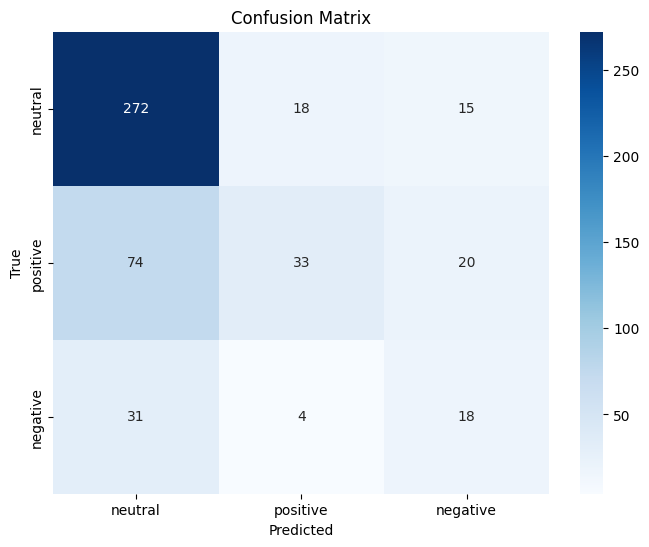

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

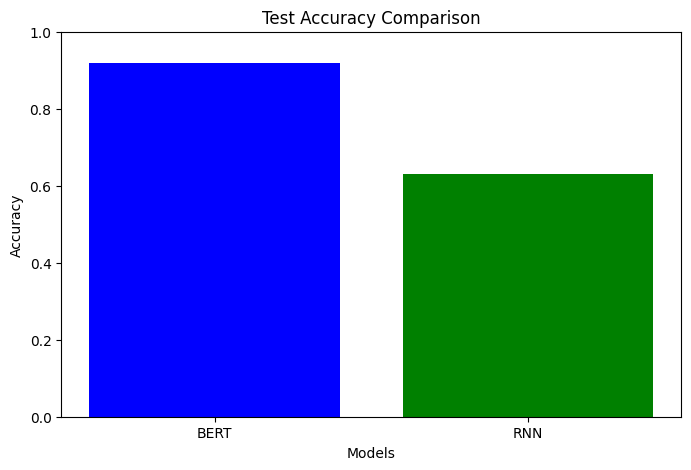

In [85]:
import matplotlib.pyplot as plt

models = ['BERT', 'RNN']
accuracy = [0.9175, 0.6306]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0, 1.0)
plt.show()


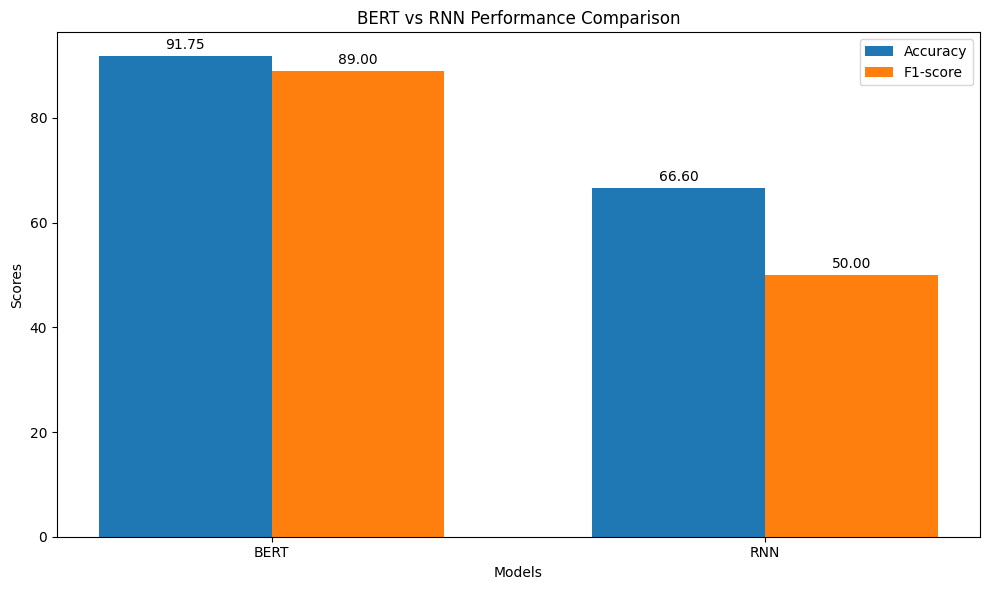

In [87]:
import numpy as np
import matplotlib.pyplot as plt

accuracy_bert = 91.75
f1_bert = 89.0

accuracy_rnn = 66.60
f1_rnn = 50.0

models = ['BERT', 'RNN']
accuracy_scores = [accuracy_bert, accuracy_rnn]
f1_scores = [f1_bert, f1_rnn]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('BERT vs RNN Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax)
autolabel(rects2, ax)

fig.tight_layout()

plt.show()
